In [1]:
import sys
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
%%time
try:
    df = pd.read_pickle(r"local_data/LSWMD.pkl")
    print("Pickle file read successfully")
except Exception as e:
    print(f"Error reading pickle file: {e}")


Pickle file read successfully
CPU times: user 34.7 s, sys: 2.22 s, total: 36.9 s
Wall time: 37.2 s


In [3]:
df.shape[0]

811457

In [4]:
df.shape[1]

6

In [5]:
df.count()

waferMap          811457
dieSize           811457
lotName           811457
waferIndex        811457
trianTestLabel    811457
failureType       811457
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [7]:
display(df)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [8]:
print(f"Total records: {len(df)}")
print(f"Datafram shape: {df.shape}")

Total records: 811457
Datafram shape: (811457, 6)


In [9]:
%%time
labeled = list()
unlabeled = list()

for i, row in df.iterrows():
    label = failureType = None
    try:
        if row['trianTestLabel'][0][0]:
            label = row['trianTestLabel'][0][0]
        if row['failureType'][0][0]:
            failureType =  row['failureType'][0][0]
        labeled.append([row['waferMap'], row['dieSize'], row['lotName'], row['waferIndex'], label, failureType])
    except:
        unlabeled.append([row['waferMap'], row['dieSize'], row['lotName'], row['waferIndex'], label, failureType])
        
df_labeled = pd.DataFrame(labeled, columns=['waferMap', 'dieSize', 'lotName', 'waferIndex', 'label', 'failureType'])
df_unlabeled = pd.DataFrame(unlabeled, columns=['waferMap', 'dieSize', 'lotName', 'waferIndex', 'label', 'failureType'])

CPU times: user 37.7 s, sys: 238 ms, total: 37.9 s
Wall time: 38 s


In [10]:
df_labeled.count()

waferMap       172950
dieSize        172950
lotName        172950
waferIndex     172950
label          172950
failureType    172950
dtype: int64

In [11]:
df_unlabeled.count()

waferMap       638507
dieSize        638507
lotName        638507
waferIndex     638507
label               0
failureType         0
dtype: int64

In [12]:
172950 + 638507

811457

In [13]:
display(df_labeled)

,waferMap,dieSize,lotName,waferIndex,label,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none
...,...,...,...,...,...,...
172945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc
172946,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc
172947,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring
172948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc


In [14]:
print(*df_labeled['failureType'].unique(), sep="\n")

none
Loc
Edge-Loc
Center
Edge-Ring
Scratch
Random
Near-full
Donut


In [15]:
df_labeled['failureType'].value_counts()

failureType
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64

In [16]:
df.sort_values(by='dieSize', ascending=False)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
244106,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15277,25.0,[],[]
244110,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15279,2.0,[],[]
244100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15277,1.0,[],[]
244101,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15277,3.0,[],[]
244102,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",48099.0,lot15277,5.0,[],[]
...,...,...,...,...,...,...
749737,"[[0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",31.0,lot45034,7.0,[],[]
7237,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",21.0,lot292,7.0,[],[]
7232,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",21.0,lot292,1.0,[],[]
7236,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",12.0,lot292,6.0,[],[]


In [17]:
print(df['trianTestLabel'][1000][0][0])
print(df['failureType'][1000][0][0])

Training
none


In [18]:
print(df.iloc[1000])

waferMap          [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1,...
dieSize                                                       533.0
lotName                                                       lot41
waferIndex                                                      1.0
trianTestLabel                                         [[Training]]
failureType                                                [[none]]
Name: 1000, dtype: object


In [19]:
df.waferMap[42]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

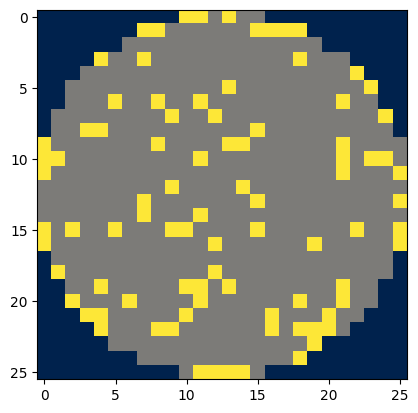

In [20]:
plt.imshow(df.waferMap[1000], 'cividis')

In [21]:
for row in df.waferMap[1000]:
    print(*row)

0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 1 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 2 2 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 0 0 0
0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0
0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 0
0 0 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 0 0
0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
0 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0
2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1
2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2
1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2
1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
2 1 2 1 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2
2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2
0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0
0 0 1 1 2 1 

In [22]:
wafer_failures = dict()
for f in df_labeled['failureType'].unique():
    wafer_failures[f] = df_labeled[df_labeled['failureType'] == f]        

In [40]:
def show_samples(wafer, failureType) -> None:
    """Displays a sample of images for a failure type

    input:
      images: list() of images
      
      failureType: string:  
            none
            Loc
            Edge-Loc
            Center
            Edge-Ring
            Scratch
            Random
            Near-full
            Donut

    output: none - displays images

    """
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(1, 8, figsize=(8, 8))
    
    img_n=0
    for i, row in wafer[failureType].sample(8).iterrows():
        wafer_info = str(row['lotName']) + "wfr" + str(row['waferIndex'])
        axes[img_n].imshow(row['waferMap'], 'cividis', extent=[0,100,0,1], aspect=100)
        axes[img_n].set_title(wafer_info)
        axes[img_n].set_xlabel(row['failureType'])
        axes[img_n].get_xaxis().set_ticks([])
        axes[img_n].get_yaxis().set_ticks([])
        axes[img_n].axis('on')
        img_n+=1

    plt.show()
    
    # Show the plot

none


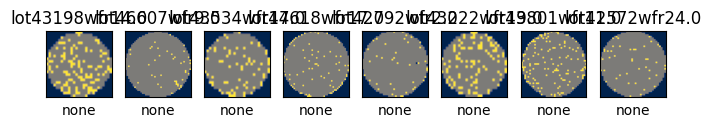

Loc


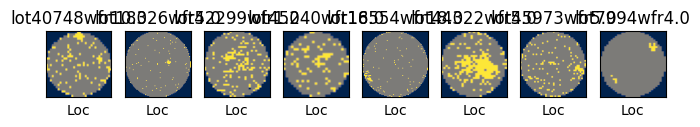

Edge-Loc


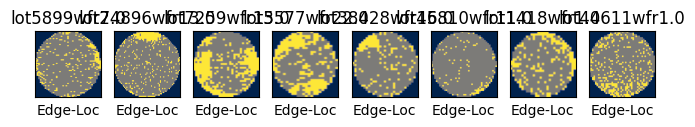

Center


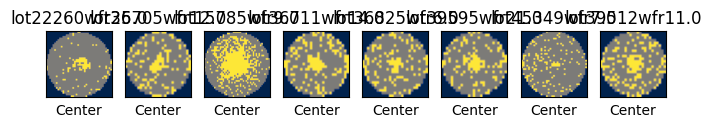

Edge-Ring


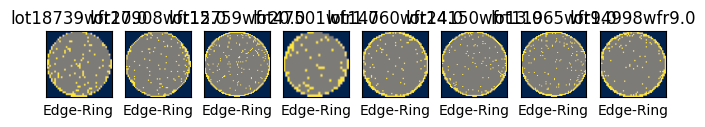

Scratch


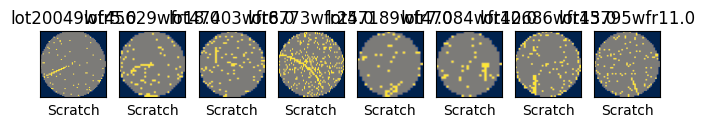

Random


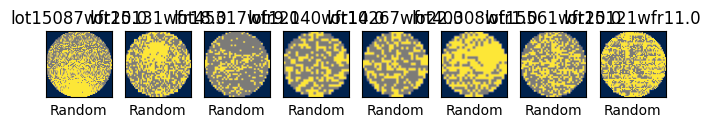

Near-full


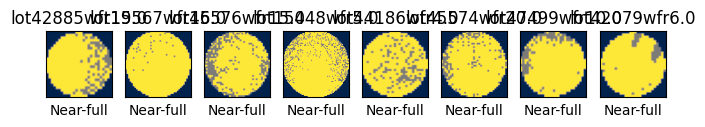

Donut


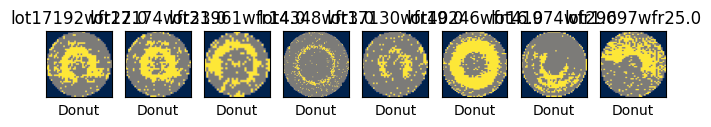

In [41]:
for f in df_labeled['failureType'].unique():
    b_start='\033[1m'
    b_end='\033[0m'
    print(f"{b_start}{f}{b_end}")
    show_samples(wafer_failures, f)

In [25]:
print(df.isnull().sum())
df.dropna() # Remove rows with missing values
df.fillna(0) # Fill missing values

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
